In [149]:
import pandas as pd
import numpy as np
from numpy import nan as NA
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns

In [150]:
import os
os.getcwd()

'C:\\Users\\Graduate\\Desktop\\DU Fall Quarter\\Python\\Midterm'

#### EXECUTIVE SUMMARY
        
    The following report will explore data on the 2019 FIFA Women's World Cup. The report focuses on finding the relationship between players, teams, and their respective CAPS, as well as the field positions of the players. CAPS represents the number of appearances a player has made with their senior national team, and they are only awarded in international games. Since CAPS are not easily obtainable, the report uses the players' and teams' overall CAPS as an indicator of their experience. The assumption is that the higher the CAPS, the more successful the players and the teams should be. In the World Cup, success translates to the number of goals scored and how far the teams advanced. For instance, team USA had the highest CAPS among all teams (total of 1842) as of 2019, and they also won the World Cup. This report tests that assumption by analyzing the data and answering the four research questions listed in the next section.  

    The three datasets used for this analysis are: "Womens Squads" contains data on each of the 23 players for all 24 teams in the 2019 WorldCup. "FIFA Women's World Cup Results" has data on the 24 countries' total goals, yellow cards, red cards, and others. Lastly, the "2019WorldCup_Results" dataset shows the results of the 2019 Women's World Cup. These three datasets are merged and cleaned to form the main data frame for the analysis, called "ct". This data frame is divided into two tables referenced as "main" and "secondary" throughout the analysis. The main table refers to all data from columns 0-8, which contains information on all 522 players of the 2019 World Cup. The secondary table refers to data from columns 9-15, which contains information on the World Cup grouped by countries. Hence, the secondary table only has 24 rows with data corresponding to each of the 24 participating teams). 

    The report concludes that players with higher CAPS scored more goals throughout their careers compared to those players with lower CAPS. There is a 0.66 correlation between the players' CAPS and the number of goals scored. The data also shows that teams with higher CAPS scored, on average, more goals in the World Cup than those with lower CAPS. The correlation coefficient of 0.60 shows a mildly strong correlation between team total CAPS and goals. Similarly, countries with higher CAPS made it further in the World Cup than those with lower CAPS. Teams with above-average CAPS made it to semi-finals and the final, while teams with below-average CAPS made it to Quarter Finals at most. Lastly, the position that scored the most goals across all players is Forward (FW).
    

#### RESEARCH QUESTIONS

    1. Did players with higher CAPS score more goals throughout their careers than those with lower CAPS?
    2. Did teams with higher CAPS score more goals than those with lower CAPS during the 2019 World Cup?
    3. Did countries with higher CAPS make it further in the World Cup compared to those with lower CAPS?
    4. Is there a position that notably scored the most goals across all players?


#### DATA DICTIONARY

In [152]:
# Create Data Dictionary

#Please use data dictionary at any point of the report to find defitions of columns and their data types.
#Simply type "dictionary.get("InsertColumnNameHere")

dictionary = dict(Country='Country Name. Example: Brazil. Data type: Categorical ', 
                  Position='Position in which each player plays. In this dataset, the positions are: MF (Midfield), GK (Goalkeeper), FW (Forward), DF (Defense). Example: Defense. Data Type: Categorical.',
                  Player='Players Name. Example: Sophia Smith. Data type: Categorical ',
                  Age='Players Age. Example: 24. Data Type: Numerical',
                  CAPS='Number of appearances a player has made with their senior national team. According to FIFAs regulations handbook, caps are only awarded in International A games, which are the following: World Cup games, World Cup qualifiers, continental competitions and its qualifying games, friendly games between senior national teams and Olympic games and its qualifiers. Example: 250. Data Type: Numerical',
                  Num_Goals='Sum of goals the player has scored in their professional career. Does not only include goals from the 2019 World Cup. Example: 10. Data Type: Numerical',
                  Year='Year of World Cup that the data corresponds to. Example: 2019. Data type: Numerical',
                  Country_2='Country Name. Example: Brazil. Data type: Categorical',
                  Year_2='Year of World Cup that the data corresponds to. Example: 2019. Data type: numerical',
                  Team_Goals='Total number of goals scored by the country in the 2019 World Cup. Example: 25. Data type: Numerical',
                  Team_CAPS='Total amount of CAPS per team as of 2019. It is a sum of the CAPS of each of its individual players. Example: 1842. Data type: Numerical',
                  Highest_Stage_Achieved='Highest stage that the country got to during the 2019 World Cup. The stages have the following hierarchical order: Group, Round of 16, Quarter Finals, Semi Finals, Final. Example: Final. Data type: Categorical',
                  Stage_Num='Numerical representation of the highest stage achieved by each country. Values are recoded from column "Highest_Stage_Achieved". The values are as follows: Final=10, Semi Final=8, Quarter Final=6, Round of 16=4, Group=2. Example: 10. Data type: numerical',
                 )

dictionary.get("Position")

'Position in which each player plays. In this dataset, the positions are: MF (Midfield), GK (Goalkeeper), FW (Forward), DF (Defense). Example: Defense. Data Type: Categorical.'

### PART 1: 
#### THE DATA

#### 1.1 Reading and merging datasets

In [155]:
# Read dataset #1 - Women Squads
table1 = pd.read_csv('Women Squads.csv', names=['Squad Nro.', 'Country', 'Position', 'Player', 'DOB', 'Age', 'CAPS', 'NumGoals', 'Club'], 
                     skiprows=[0],
                     encoding='latin-1')
table1 = table1.drop('Club', axis=1)
table1 = table1.drop('Squad Nro.', axis=1)
table1 = table1.drop('DOB', axis=1)

# Creating a dataframe out of the table1
df1 = DataFrame(table1) 
df1['Year'] = '2019'

# Recode values from US to USA to standardize data across datasets
df1.iloc[0:23, 0] = 'USA'
df1.head()

,Country,Position,Player,Age,CAPS,NumGoals,Year
0,USA,GK,Alyssa Naeher,31,43.0,0.0,2019
1,USA,FW,Mallory Pugh,21,50.0,15.0,2019
2,USA,MF,Sam Mewis,26,47.0,9.0,2019
3,USA,DF,Becky Sauerbrunn,34,155.0,0.0,2019
4,USA,DF,Kelley O'Hara,30,115.0,2.0,2019


In [156]:
# Read dataset #2 - FIFA Womens World Cup Results
read2 = pd.read_csv('FIFA Womens World Cup Results.csv')

#Create DataFrame
df2 = pd.DataFrame(read2)
df2.drop(df2.columns[[0,3,5,6,8,9,10,11]], axis=1, inplace=True)
df3 = df2.rename(columns={"squad":"Country", "year":"Year", "age":"Age", "goals":"Team_Goals","yellow_cards":"Team_Yellow_Cards", "red_cards":"Team_Red_Cards"})
df3['Year'] = df3['Year'].astype(str)
df3.head()

,Country,Year,Age,Team_Goals,Team_Yellow_Cards,Team_Red_Cards
0,Argentina,2019,26.8,2,3.0,0.0
1,Australia,2019,25.4,8,2.0,0.0
2,Brazil,2019,29.7,7,7.0,0.0
3,Cameroon,2019,27.7,3,6.0,0.0
4,Canada,2019,27.0,4,2.0,0.0


In [131]:
# df3 contains historical information regarding World Cups, as far as 1991. See below
df3.iloc[130:135, 0:]

,Country,Year,Age,Team_Goals,Team_Yellow_Cards,Team_Red_Cards
130,Japan,1991,24.3,0,NaN,NaN
131,New Zealand,1991,25.5,1,NaN,NaN
132,Nigeria,1991,18.2,0,NaN,NaN
133,Norway,1991,24.1,13,NaN,NaN
134,Sweden,1991,25.4,17,NaN,NaN


In [157]:
# Since this report focuses on 2019, we will get rid of all years that are not 2019
df4 = df3.drop(df3.index[24:])

# Dropping Age, Yellow and Red cards columns becase they are not useful for the analysis of research questions
df5 = df4.drop(df4.columns[[2, 4, 5]], axis=1)
df5.head()

,Country,Year,Team_Goals
0,Argentina,2019,2
1,Australia,2019,8
2,Brazil,2019,7
3,Cameroon,2019,3
4,Canada,2019,4


In [133]:
# Creating variable to store sum of CAPS by Team, which will be needed for the analysis
CAPS_c = pd.DataFrame(df1.groupby(by=["Country"]).CAPS.sum())

# Merge variable with DataFrame df5
CAPS_merge = pd.merge(df5, CAPS_c, how='outer', on='Country')
CAPS_merge.head(2)

,Country,Year,Team_Goals,CAPS
0,Argentina,2019,2.0,443.0
1,Australia,2019,8.0,1276.0


In [158]:
# Read dataset #3 - '2019WorldCup_Results.csv'
read3 = pd.read_csv('2019WorldCup_Results.csv', names=['Country', 'Highest_Stage_Achieved'])
dframe2 = pd.DataFrame(read3)

# Merging to previous dataset
merge3 = pd.merge(CAPS_merge, dframe2, left_on='Country', right_on='Country')

# The "Highest_Stage_Achieved" column will be used in one the research questions. However, the stages need to be recoded as numerical values for the analysis
# Recoding "Highest_Stage_Achieved" as numerical values and storing recoded data in new column called "Stage_Num"

merge3['Stage_Num'] = merge3['Highest_Stage_Achieved'].replace(to_replace=['Final', 'Semi Final', 'Quarter Final', 'Round of 16', 'Group'], 
                                                         value=[10, 8, 6, 4, 2])

# Renaming columns
merge4 = merge3.rename(columns={"Country":"Country_2", "Year":"Year_2", "CAPS":"Team_CAPS"})
merge4.head()

,Country_2,Year_2,Team_Goals,Team_CAPS,Highest_Stage_Achieved,Stage_Num
0,Argentina,2019,2.0,443.0,Group,2
1,Australia,2019,8.0,1276.0,Round of 16,4
2,Brazil,2019,7.0,1039.0,Round of 16,4
3,Cameroon,2019,3.0,667.0,Round of 16,4
4,Canada,2019,4.0,1369.0,Round of 16,4


In [159]:
# Creating Final DataFrame

ct = pd.concat([df1, merge4], axis="columns")

# Drop second year column
ct = ct.drop('Year_2', axis=1)

# Please note - the "Country_2" column marks the start of the secondary table. Recall that the secondary table contains data of the 2019 World Cup grouped by country
# All remaining columns will be useful for analysis. 

ct.head()

,Country,Position,Player,Age,CAPS,NumGoals,Year,Country_2,Team_Goals,Team_CAPS,Highest_Stage_Achieved,Stage_Num
0,USA,GK,Alyssa Naeher,31,43.0,0.0,2019,Argentina,2.0,443.0,Group,2.0
1,USA,FW,Mallory Pugh,21,50.0,15.0,2019,Australia,8.0,1276.0,Round of 16,4.0
2,USA,MF,Sam Mewis,26,47.0,9.0,2019,Brazil,7.0,1039.0,Round of 16,4.0
3,USA,DF,Becky Sauerbrunn,34,155.0,0.0,2019,Cameroon,3.0,667.0,Round of 16,4.0
4,USA,DF,Kelley O'Hara,30,115.0,2.0,2019,Canada,4.0,1369.0,Round of 16,4.0


#### 1.2 Cleaning Data

In [136]:
# Gather information on the composition of the columns
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 552 non-null    object 
 1   Position                552 non-null    object 
 2   Player                  552 non-null    object 
 3   Age                     552 non-null    int64  
 4   CAPS                    520 non-null    float64
 5   NumGoals                520 non-null    float64
 6   Year                    552 non-null    object 
 7   Country_2               24 non-null     object 
 8   Team_Goals              24 non-null     float64
 9   Team_CAPS               23 non-null     float64
 10  Highest_Stage_Achieved  24 non-null     object 
 11  Stage_Num               24 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 51.9+ KB



    From the results above, we can see that the dataset has 12 columns and between 23 and 552 rows. This is because the columns with 552 rows contain the information for each of the 23 players of all 24 teams (the main table), and the columns with 24 rows contain stats by countries (the secondary table). 
    
    The "Country", "Position", and "Player" columns have "object" as their data type, which means they contain categorical data. "Age" data type is int64, which means the columns contain numerical data. Lastly, the "CAPS" and "NumGoals" columns have float64 data type, which means they contain numerical values as decimals. The columns "CAPS" and "NumGoals" have 520 observations, which is 32 less observations than the other columns. This means that there are missing values in those two columns. 
    
    Lastly, all columns with 24 values need to be filled out with zeros to correct NULL values. The NULL values occur due to the discrepancy in number of observations between the main and secondary table (552 observations vs. 24)

In [160]:
# #Replacing NaN with '0.0' and making the change permanent in the DataFrame
ct.fillna(0.0, inplace=True) 

# Visualize the rows 22-32 of the dataset to ensure that the NULL values have been taken care of. Recall that rows number 25 and after had missing values on the secondry table
# If the data cleaning was effective, rows after 24 should now show zeros instead of NULL values
ct.loc[22:32]

,Country,Position,Player,Age,CAPS,NumGoals,Year,Country_2,Team_Goals,Team_CAPS,Highest_Stage_Achieved,Stage_Num
22,USA,FW,Christen Press,30,113.0,47.0,2019,Thailand,1.0,443.0,Group,2.0
23,Thailand,GK,Waraporn Boonsing,29,87.0,0.0,2019,USA,25.0,1842.0,Final,10.0
24,Thailand,DF,Kanjanaporn Saengkoon,22,0.0,0.0,2019,0.0,0.0,0.0,0.0,0.0
25,Thailand,DF,Natthakarn Chinwong,27,11.0,0.0,2019,0.0,0.0,0.0,0.0,0.0
26,Thailand,DF,Duangnapa Sritala,33,25.0,2.0,2019,0.0,0.0,0.0,0.0,0.0
27,Thailand,DF,Ainon Phancha,27,7.0,3.0,2019,0.0,0.0,0.0,0.0,0.0
28,Thailand,MF,Pikul Khueanpet,30,44.0,0.0,2019,0.0,0.0,0.0,0.0,0.0
29,Thailand,MF,Silawan Intamee,25,14.0,0.0,2019,0.0,0.0,0.0,0.0,0.0
30,Thailand,FW,Suchawadee Nildhamrong,22,17.0,12.0,2019,0.0,0.0,0.0,0.0,0.0
31,Thailand,DF,Warunee Phetwiset,28,44.0,0.0,2019,0.0,0.0,0.0,0.0,0.0


In [138]:
# Checking that all NULL values have been recoded across the dataframe
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 552 non-null    object 
 1   Position                552 non-null    object 
 2   Player                  552 non-null    object 
 3   Age                     552 non-null    int64  
 4   CAPS                    552 non-null    float64
 5   NumGoals                552 non-null    float64
 6   Year                    552 non-null    object 
 7   Country_2               552 non-null    object 
 8   Team_Goals              552 non-null    float64
 9   Team_CAPS               552 non-null    float64
 10  Highest_Stage_Achieved  552 non-null    object 
 11  Stage_Num               552 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 51.9+ KB


    
    Now, the dataframe has 12 columns and 552 rows across all columns, with no NULLs. All data types are consistent with what is needed for the analysis. 


In [161]:
ct.to_csv('final version file_AnaliaColffer.csv')

### PART 2:
#### DATA EXPLORATION

#### 2.1 Descriptive Statistics

In [163]:
# Get descriptive statistics on numerical columns for the main table
round(ct[['Age','CAPS', 'NumGoals']].describe(),2)

,Age,CAPS,NumGoals
count,552.00,552.00,552.00
mean,26.05,41.13,6.92
std,4.06,43.60,15.18
min,16.00,0.00,0.00
25%,23.00,8.00,0.00
50%,26.00,26.00,1.00
75%,29.00,61.00,8.00
max,41.00,282.00,181.00


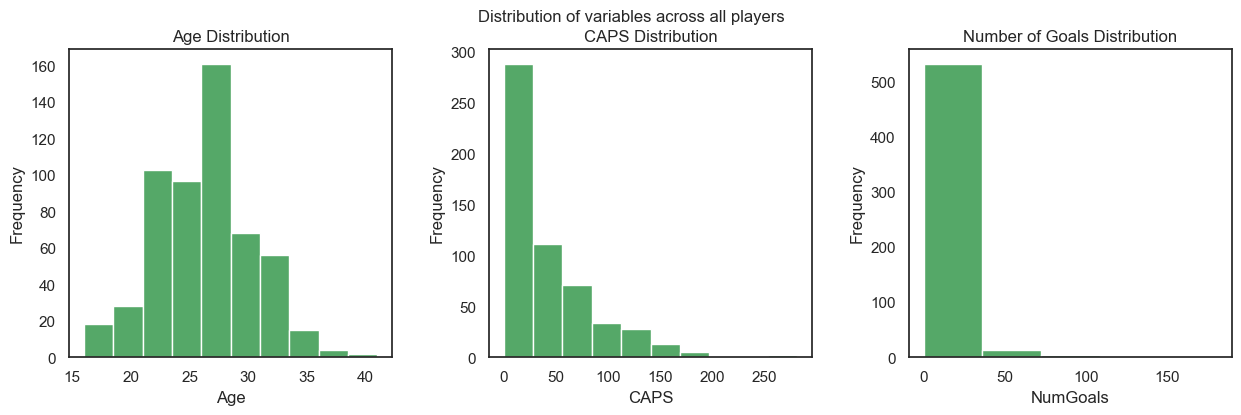

In [164]:
# Visualize distribution for Ages, CAPS, and NumGoals

plt.figure(figsize=(15,4))
plt.suptitle('Distribution of variables across all players', fontsize='12')
plt.subplots_adjust(hspace = .5, wspace= .3)

plt.subplot(1,3,1)
plt.hist(ct.Age, 10, color='g')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.hist(ct.CAPS, 10, color='g')
plt.title('CAPS Distribution')
plt.xlabel('CAPS')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.hist(ct.NumGoals, 5, color='g')
plt.title('Number of Goals Distribution')
plt.xlabel('NumGoals')
plt.ylabel('Frequency')

plt.show()

In [165]:
# See 2 playeres with the highest CAPS
ct.nlargest(2, 'CAPS')

,Country,Position,Player,Age,CAPS,NumGoals,Year,Country_2,Team_Goals,Team_CAPS,Highest_Stage_Achieved,Stage_Num
149,Canada,FW,Christine Sinclair,35,282.0,181.0,2019,0.0,0.0,0.0,0.0,0.0
9,USA,FW,Carli Lloyd,36,271.0,107.0,2019,Germany,10.0,791.0,Quarter Final,6.0


    The results above show the following:
    
        1) The mean Age between all players is 26.05 years, with the youngest and oldest players being 16 and 41 years old, respectively 
        2) The distribution of age is somewhat normally distributed. It peaks between 25 and 30 years old
        3) The average number of CAPS per player is 41.13, with 0 being the minimum and 282 the maximum
        4) The maximum number of CAPS corresponds to player Christine Sinclair, from Canada, whose CAPS were 282 as of 2019
        5) Both CAPS and NumGoals are highly skewed to the right and have have high standard deviations. More on this to be analyzed later
        6) The average Number of Goals by player is 6.9 goals, with zero goals as the minimum and 181 as the maximum
        7) The maximum number of goals also corresponds to player Christine Sinclair, who had scored 181 goals in their career as of 2019
        8) NumGoals is extremely skewed to the right
      

In [166]:
# Get descriptive statistics on numerical variables for the secondary table

# Create DataFrame with data from the secondary table, for ease of analysis

# Reference secondary table
imp = ct.iloc[0:24, 7:14]
# Create DataFrame - Moving forward, this dataframe will be used for analysis on the secondary table
cd1 = pd.DataFrame(imp)

# Get stats
round(cd1[['Team_Goals', 'Team_CAPS']].describe(),2)

,Team_Goals,Team_CAPS
count,24.00,24.00
mean,5.75,901.04
std,5.79,448.72
min,0.00,0.00
25%,1.00,611.00
50%,4.00,953.00
75%,9.25,1221.75
max,25.00,1842.00


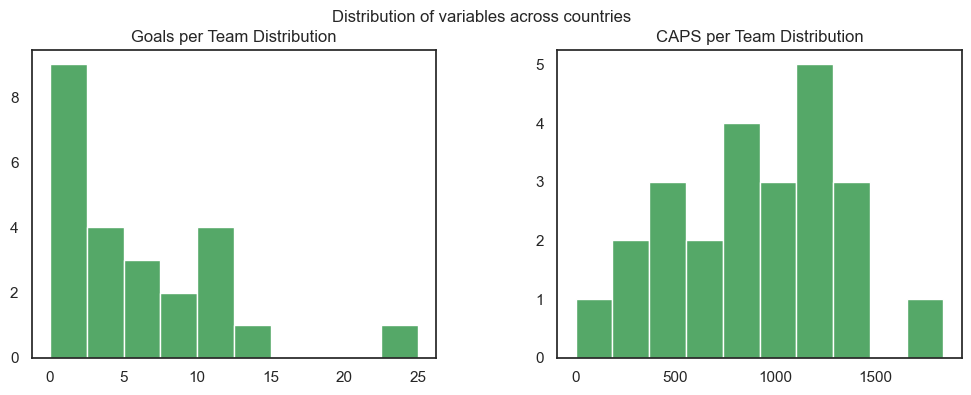

In [167]:
# Visualize distribution of Goals and CAPS per Team

plt.figure(figsize=(12,4))
plt.suptitle('Distribution of variables across countries', fontsize='12')
plt.subplots_adjust(hspace = .5, wspace= .3)

plt.subplot(1,2,1)
plt.hist(cd1.Team_Goals, 10, color='g')
plt.title('Goals per Team Distribution')

plt.subplot(1,2,2)
plt.hist(cd1.Team_CAPS, 10, color='g')
plt.title('CAPS per Team Distribution')

plt.show()

In [168]:
# Find the country with the most goals scored during the 2019 World Cup

cd1.nlargest(2, 'Team_Goals')

,Country_2,Team_Goals,Team_CAPS,Highest_Stage_Achieved,Stage_Num
23,USA,25.0,1842.0,Final,10.0
7,England,13.0,1031.0,Semi Final,8.0


    The results above show the following:

        1) The mean number of goals per country during the 2019 World Cup is 5.75. The maximum number of goals per country is 25 goals
        2) The histogram of Goals per team shows an outlier on the far right. This data corresponds to team USA, who scored 25 goals in the tournament. Although the distribution for Team_Goals may be more normalized if the outlier is deleted from the dataset, this is not recommended. Information on all teams is essential for this analysis.
        3) The mean number of CAPS per country during the 2019 World Cup is 901.04
        4) The distribution of CAPS per country is skewed to the left, also with al outlier to the far right. This data also corresponds to Team USA, who had a total CAPS of 1842 combined among all players. This skewness can also be seen in the Team_CAPS high standard deviation. 
    

In [169]:
# Get stats on categorical columns from the main table
ct[['Country', 'Position']].describe()

,Country,Position
count,552,552
unique,24,4
top,USA,DF
freq,23,175


In [170]:
# The list below shows the 24 countries that competed in the 2019 World Cup.

ct.Country.unique()

array(['USA', 'Thailand', 'Sweden', 'Chile', 'New Zealand', 'Netherlands',
       'Canada', 'Cameroon', 'Scotland', 'Japan', 'England', 'Argentina',
       'Jamaica', 'Italy', 'Brazil', 'Australia', 'Spain', 'South Africa',
       'Germany', 'China PR', 'South Korea', 'Norway', 'Nigeria',
       'France'], dtype=object)

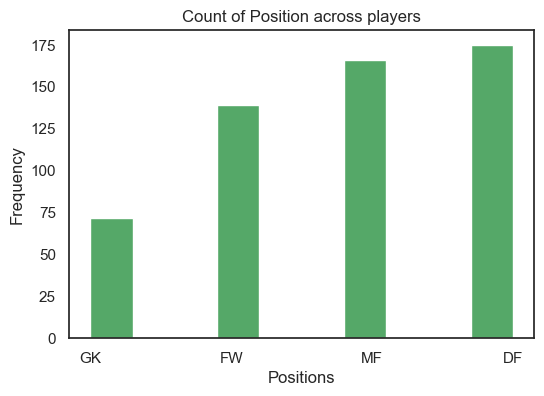

In [171]:
# Visualize frequency of each position

plt.figure(figsize=(6,4))

plt.hist(ct.Position, 10, color='g')
plt.title('Count of Position across players')
plt.xlabel('Positions')
plt.ylabel('Frequency')
plt.show()


    From the results above, we know the following:
        1) 24 countries competed in the World Cup
        2) This dataset presents four unique soccer positions
        3) The most frequent position across players is defense, and goalkeeper is the least frequent position. This was expected, since only one goalkeeper at a time can play in a match, but there can be more than one player in defense. 
    

In [172]:
# Get stats for categorical columns from the secondary table
cd1[['Highest_Stage_Achieved']].describe()

,Highest_Stage_Achieved
count,24
unique,5
top,Group
freq,8


In [173]:
# The below list shows the five stages of the World Cup

cd1.Highest_Stage_Achieved.unique()

array(['Group', 'Round of 16', 'Semi Final', 'Quarter Final', 'Final'],
      dtype=object)

### Research Question #1: 
#### Did players with higher CAPS score more goals throughout their careers than those with lower CAPS?

##### Step 1: Visualize distribution of CAPS across players from all teams

In [174]:
# First, create bins for CAPS per player

ind_CAPS = ct['CAPS']
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,160,180,200]
cats = pd.cut(ind_CAPS, bins)
counts = pd.Series(cats).value_counts()
counts

(0, 10]       110
(10, 20]       88
(20, 30]       54
(30, 40]       48
(40, 50]       45
(60, 70]       28
(70, 80]       25
(50, 60]       23
(80, 90]       14
(90, 100]      13
(120, 130]     11
(140, 160]     11
(100, 110]     10
(110, 120]     10
(130, 140]      9
(180, 200]      4
(160, 180]      3
Name: CAPS, dtype: int64

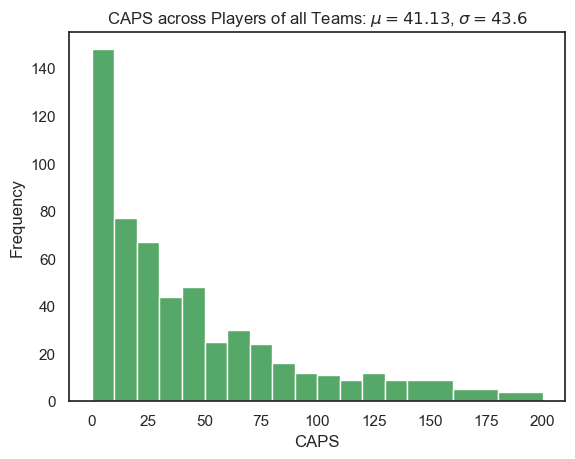

In [175]:
# Second, create Histogram

plt.hist(ct.CAPS,bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,160,180,200], color='g')
mean = str(round(ct.CAPS.mean(), 2))
stdev = str(round(ct.CAPS.std(), 2))
plt.title(f'CAPS across Players of all Teams: $\mu= {mean}$, $\sigma={stdev}$')
plt.xlabel('CAPS')
plt.ylabel('Frequency')
plt.show()  

In [176]:
# Third, calculate skewness

print(skew(ct['CAPS'], axis=0, bias=True))

1.6621047786789196


    
    As the histogram and the skewness of 1.66 show, the distribution of CAPS across all players is highly skewed to the right. Recall that if the skewness is less than -1 or greater 1, the data is considered to be highly skewed. In this context, the skewness means that there are very few players with a high number of CAPS, compared to the rest.
    

##### Step 2: Find and visualize correlation between CAPS and NumGoals

In [177]:
# Find the correlation coefficient between CAPS and NumGoals

np.corrcoef(ct['CAPS'], ct['NumGoals'])[0,1]

0.6675065431822671

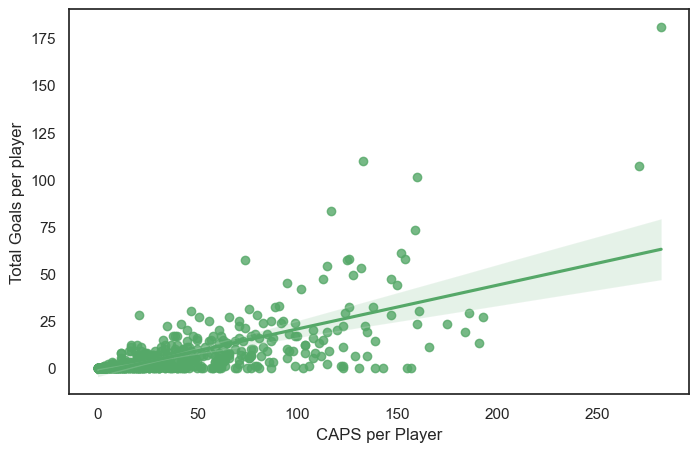

In [178]:
# Create scatterplot to visualize correlation between CAPS and NumGoals per player

x1 = ct['CAPS']
y1 = ct['NumGoals']
plt.figure(figsize=(8, 5))
data1 = {'x': x1, 'y': y1}
dfv = pd.DataFrame(data1)
sns.regplot(x = "x", y = "y", data = dfv, color='g')
sns.set_theme(style='white')
plt.xlabel('CAPS per Player')
plt.ylabel('Total Goals per player')
plt.grid(False)

    
    The correlation coefficient of 0.67 shows that there is a positive relationship between the players' CAPS and the number of goals they scored up to 2019. This is also shown in the scatterplot's positive trend. However, it is highly important to mention that there are two outliers in the data with a high number of both CAPS and Goals per player. These outliers may be driving up the correlation between the two variables.
    
    There is a lot of variance in the data. For example, there are many players with high CAPS who scored less than or equal to 25 goals as of 2019. This means that there are more factors (aside from CAPS) that influence the number of goals each player scores. 
    

#### Research Question #2: 
#### Did teams with higher CAPS score more goals than those with lower CAPS during the 2019 World Cup? 

##### Step 1: Visualize distribution of CAPS among countries

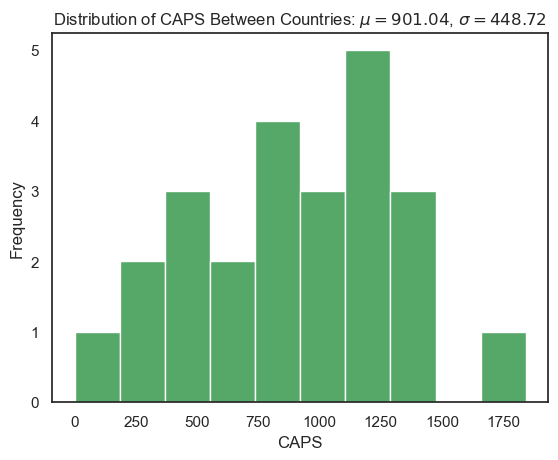

In [179]:
# Creating a histogram to visualize distribution of CAPS among Teams

c1 = cd1['Team_CAPS']

plt.hist(c1, 10, color='g')
mean1 = str(round(c1.mean(),2))
stdev1 = str(round(c1.std(),2))
plt.title(f'Distribution of CAPS Between Countries: $\mu= {mean1}$, $\sigma={stdev1}$')
plt.xlabel('CAPS')
plt.ylabel('Frequency')
plt.show()

In [180]:
# Find skewness in CAPS between countries

print(skew(cd1['Team_CAPS'], axis=0, bias=True))

-0.1501399809134012


    
    The negative skewness of -0.15 is consistent with the histogram above, where the left tail of the distribution is longer. However, the distribution of CAPS per country is not as skewed as CAPS between players. Recall from the descriptve statistics analysis that the mean CAPS between countries is 901 and the maximum is 1842. As explained before, team USA is the outlier on the far right of the histogram. 
    

##### Step 2: Find and visualize correlation between total Team CAPS and Team Goals

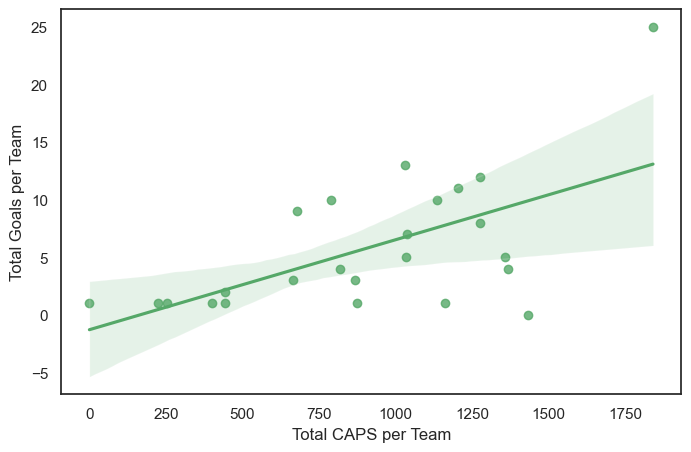

In [181]:
#Creating Scatterplot

x = cd1['Team_CAPS']
y = cd1['Team_Goals']
plt.figure(figsize=(8, 5))
data1 = {'x': x, 'y': y}
dfv = pd.DataFrame(data1)
sns.regplot(x = "x", y = "y", data=dfv, color='g')
sns.set_theme(style='white')
plt.xlabel('Total CAPS per Team')
plt.ylabel('Total Goals per Team')
plt.grid(False)

In [182]:
# Finding Correlation Coefficient

np.corrcoef(cd1['Team_Goals'], cd1['Team_CAPS'])[0,1]

0.6043450259998969

    
    The correlation coefficient of 0.60 shows that, although not strong, there is a positive relationship between the teams' CAPS and the number of goals they scored during the 2019 World Cup. The scatterplot shows that countries with higher CAPS, on average,  scored more goals than those with lower CAPS. However, the trendline shows that some countries with CAPS > 1000 (above the average) also scored < 6 goals during the World Cup. Six is the average of goals per team. 

### Research Question #3:
#### Did countries with higher CAPS make it further in the World Cup compared to those with lower CAPS?

##### Step 1: Find the average CAPS among countries

In [183]:
cd1[['Team_CAPS']].mean()

Team_CAPS    901.041667
dtype: float64

##### Step 2: Create a Bubble Chart to visualize data

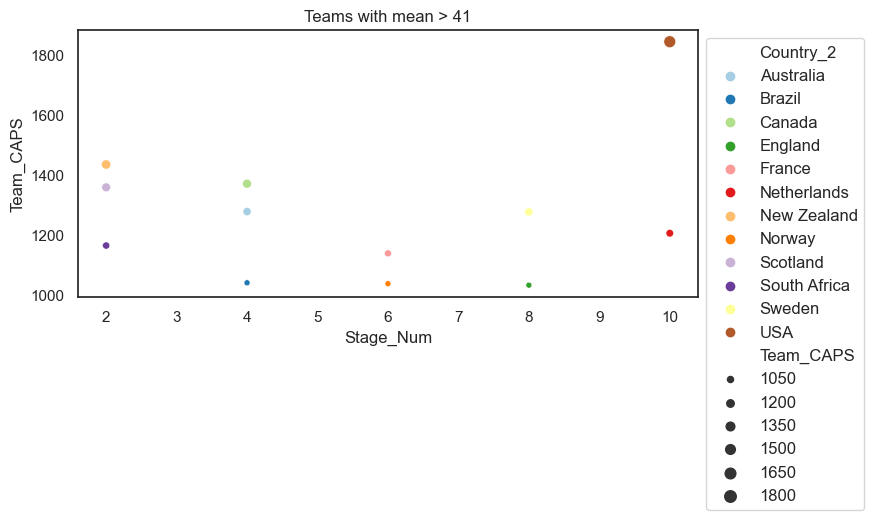

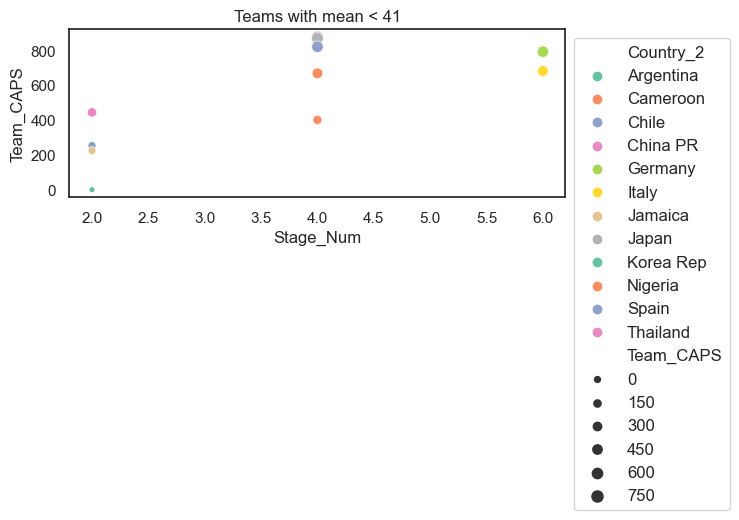

In [184]:
#Create variable for countries that have CAPS of more than 940
gr1 = cd1.loc[cd1.Team_CAPS>901]
# Convert to df
dgr1 = pd.DataFrame(gr1) 


# Create variable for countries that have CAPS of less than 940
gr2 = cd1.loc[cd1.Team_CAPS<901]
# Convert to df
dgr2 = pd.DataFrame(gr2)

data1 = dgr1
data2 = dgr2

plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace = .3)
sns.color_palette("Paired")


plt.subplot(2, 1, 1)
sns.scatterplot(data=data1, x="Stage_Num", y="Team_CAPS", size="Team_CAPS", hue="Country_2", palette="Paired")
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize=12)
plt.grid(False)
plt.title('Teams with mean > 41')
plt.show()

plt.subplot(2, 1, 2)
sns.scatterplot(data=data2, x="Stage_Num", y="Team_CAPS", size="Team_CAPS", hue="Country_2", palette="Set2")
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize=12)
plt.grid(False)
plt.title('Teams with mean < 41')
plt.show()

    
    Subplot 1 is located in the top row, and subplot 2 is located in the bottom row. Subplot 1 shows the teams with CAPS higher than 41, and subplot 2 shows the teams with CAPS lower than 41. Recall that 41 is the mean number of CAPS among teams in the tournament, so it is the benchmark for analysis. As we can see from the subplots above, teams with higher CAPS certainly made it further in the World Cup compared to those with lower CAPS. Teams with lower CAPS made it at most to Quarter Finals (stage number = 6), while teams with higher CAPS made it to Semi-Finals and Finals (stage number 8 and 10, respectively).

### Research Question 4: 
#### Is there a position that notably scored the most goals across all players?

##### Step 1: Find informaiton on the categorical variable "Position"

In [185]:
# Let's see how many players are in each position

ct.Position.value_counts()

DF    175
MF    166
FW    139
GK     72
Name: Position, dtype: int64

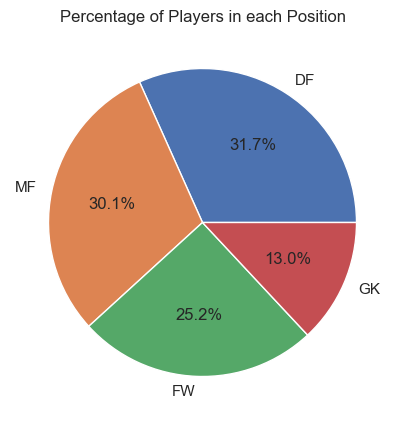

In [186]:
# Counf of players in each position
v = ['DF', 'MF', 'FW', 'GK']
v1 = ['175', '166', '139', '72']

plt.figure(figsize=(8,5))
plt.pie(v1, labels=v, autopct='%1.1f%%')
plt.title('Percentage of Players in each Position')
plt.show()

    
    The graph above shows that 30.1% of all players in 2019 played in the Middle Field position. About 31.7% of them played in the defense, 25.2% played forward, and 13% of them were goal-keepers
    

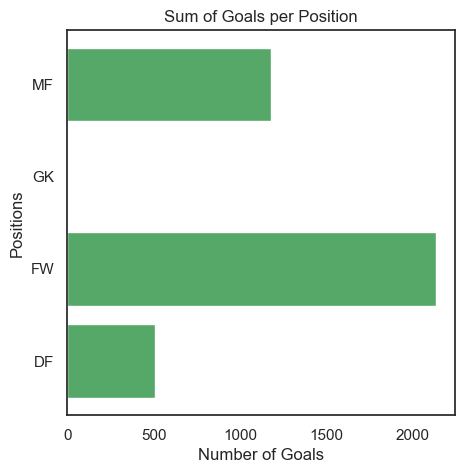

In [187]:
# Visualize sum of goals per position among all players with a Bar plot

# Create variable to store count of goals per position
position = ct.groupby(by=["Position"]).NumGoals.sum()

#Convert variable into dataframe
df_p = pd.DataFrame(position)
df_p1 = df_p.reset_index()
df_p1

#Create Bar Plot

x9 = df_p1['Position'] 
y9 = df_p1['NumGoals']
plt.figure(figsize=(5, 5))
plt.barh(x9, y9, color='g')
plt.xlabel('Number of Goals')
plt.ylabel('Positions')
plt.title('Sum of Goals per Position')
plt.show()

    
    The bar plot abpve shows that there is a position that notably scored the most goals - Forward players. Goal-keepers did not score any goals in the 2019 World Cup.
    

### PART 3: 
#### Conclusion


    This report provided interesting insights into the 2019 FIFA Women’s World Cup. For example, the importance of CAPS in the success of each player and team. This analysis confirmed a positive relationship between the number of CAPS and goals scored, both per player and per team. This means that players and teams with higher CAPS scored more goals than those with lower CAPS. However, there is a lot of variance in the data and outliers, and the correlation coefficients are only mildly strong (between 0.6 and 0.7). 

    I expected Forward players to score the most goals due to their position on the field, and also that teams with higher CAPS would make it further in the World Cup. However, I did not expect to see a not-so-strong relationship between the number of goals and CAPS. When I started this analysis, I expected to see high correlations between those two variables. The results of this report were certainly surprising, and now I am more intrigued to know what factors are significant when it comes to determining the number of goals. Looking back, there are some things I would have done differently for this analysis. For example, I would have focused on stats per country and not per player. I believe that if I had focused on only countries, I would have been able to better analyze the factors that determine the success of a team.

    Looking into the future, I would be interested in creating a regression model with input variables that determine the success of a team, measured in the number of goals in a World Cup. I would want CAPS to be one of those variables, and look at the R Squared and CAPS p-value to determine the importance of CAPS when it comes to determining the number of goals. 


### PART 4:
#### Sources:

Sports Viz Sunday(2019). Womens Squads. Data World. Retrieved Oct 9 2023 from https://data.world/sportsvizsunday/womens-world-cup-data/workspace/file?filename=Womens+Squads.xlsx

Op, Matt (2022). FIFA Women's World Cup Results. Kaggle. Retrieved Oct 9 2023 from https://www.kaggle.com/datasets/mattop/fifa-womens-world-cup-stats/data

Colffer, Analia (2023). 2019WorldCup_Results. Information retrieved from https://www.espn.com/soccer/story/_/id/37571673/2019-fifa-women-world-cup-results-full
